In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load Dataset
df = pd.read_csv("Prodigy University Dataset.csv")

In [3]:
df.head(2)

,sat_sum,hs_gpa,fy_gpa
0,508,3.4,3.18
1,488,4.0,3.33


In [4]:
df.isnull().sum()

sat_sum    0
hs_gpa     0
fy_gpa     0
dtype: int64

In [5]:
df.duplicated().sum()

4

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.describe()

,sat_sum,hs_gpa,fy_gpa
count,996.000000,996.000000,996.000000
mean,413.301205,3.198193,2.468795
std,57.223758,0.542485,0.741438
min,212.000000,1.800000,0.000000
25%,372.000000,2.800000,1.980000
50%,412.000000,3.200000,2.470000
75%,452.000000,3.700000,3.020000
max,576.000000,4.500000,4.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sat_sum  996 non-null    int64  
 1   hs_gpa   996 non-null    float64
 2   fy_gpa   996 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 31.1 KB


<Axes: >

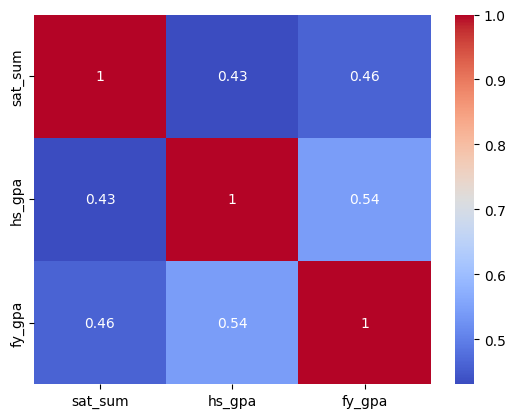

In [9]:
import seaborn as sns
corr = df.corr(numeric_only=True)
sns.heatmap(data=corr, annot=True, cmap='coolwarm')

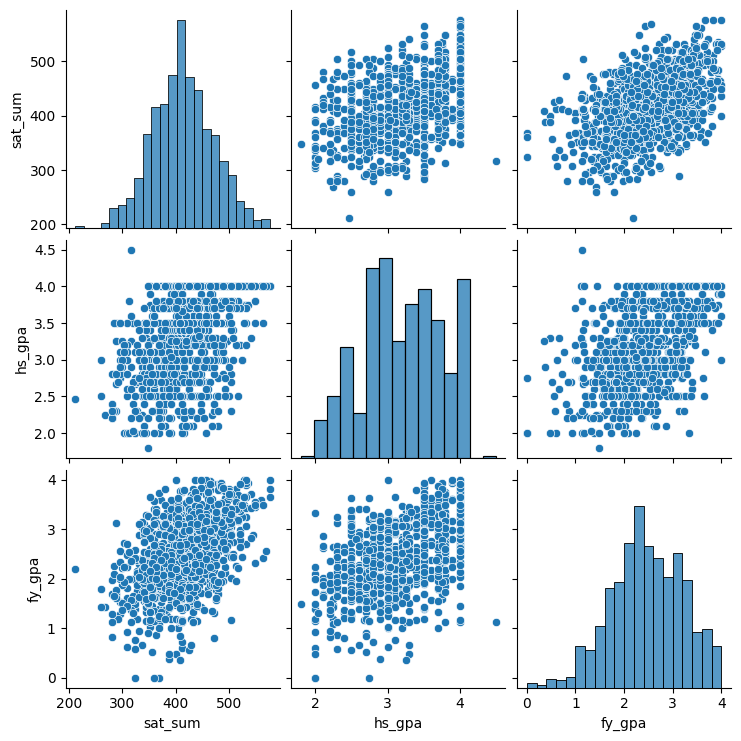

In [10]:
sns.pairplot(df)

In [11]:
# Scale SAT Score
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['sat_sum_scaled'] = scaler.fit_transform(df[['sat_sum']])

In [12]:
# Features and Target
X = df[['sat_sum_scaled', 'hs_gpa']]
y = df['fy_gpa']


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------------------
# Function to build and train model
def train_model(optimizer, X_train, y_train, X_test, y_test, batch_size, title):
    model = Sequential()
    model.add(Dense(7, activation='relu', input_dim=2))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=optimizer, loss='mean_squared_error')

    history = model.fit(X_train, y_train, epochs=100, batch_size=batch_size,
                        validation_split=0.2, verbose=0)

    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    # Plot Loss
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f"Loss Curve - {title}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    return r2



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


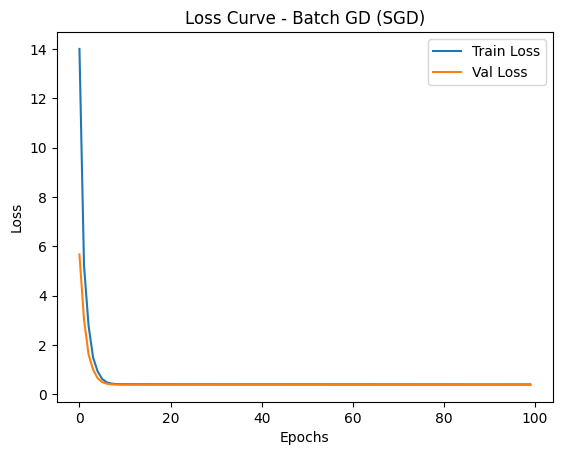

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


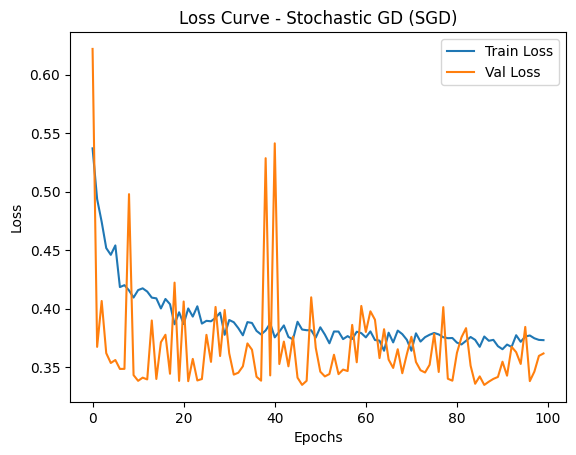

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


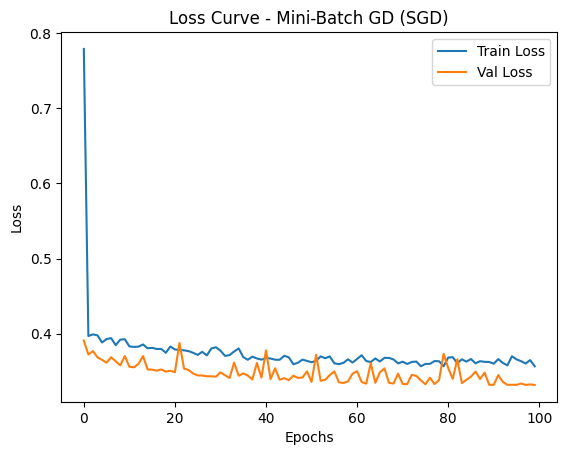

In [14]:
# Gradient Descent Types

results_gd = {}

# 1. Batch Gradient Descent (batch_size = full training data)
batch_size_full = X_train.shape[0]
r2_batch = train_model(optimizer=SGD(), X_train=X_train, y_train=y_train,
                       X_test=X_test, y_test=y_test, batch_size=batch_size_full,
                       title="Batch GD (SGD)")
results_gd["Batch GD"] = r2_batch

# 2. Stochastic Gradient Descent (batch_size = 1)
r2_sgd = train_model(optimizer=SGD(), X_train=X_train, y_train=y_train,
                     X_test=X_test, y_test=y_test, batch_size=1,
                     title="Stochastic GD (SGD)")
results_gd["Stochastic GD"] = r2_sgd

# 3. Mini-Batch Gradient Descent (batch_size = 32)
r2_minibatch = train_model(optimizer=SGD(), X_train=X_train, y_train=y_train,
                           X_test=X_test, y_test=y_test, batch_size=32,
                           title="Mini-Batch GD (SGD)")
results_gd["Mini-Batch GD"] = r2_minibatch


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


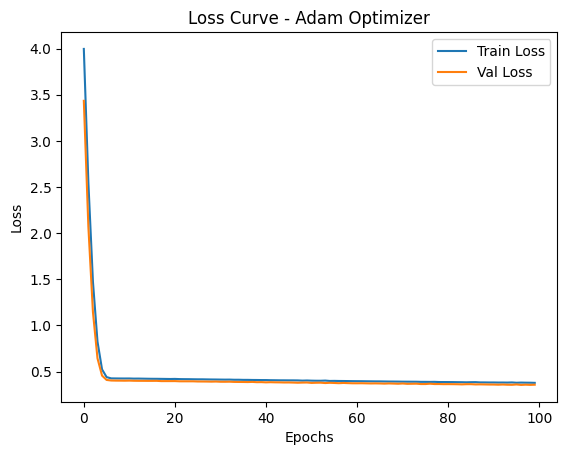

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


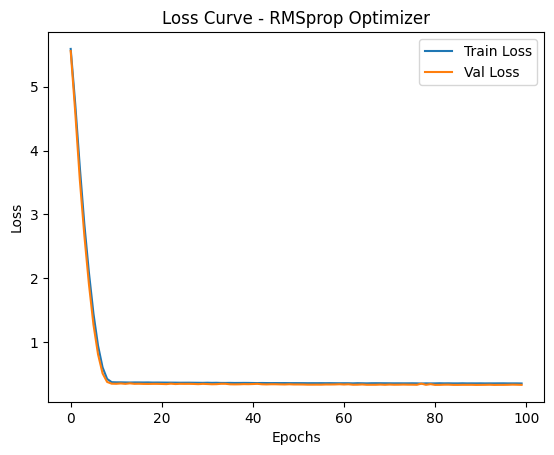

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


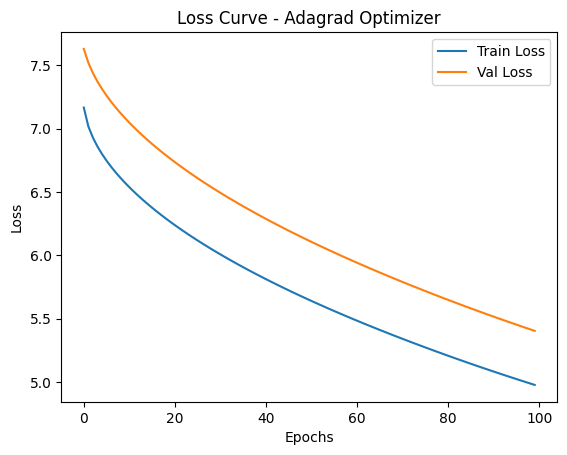

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


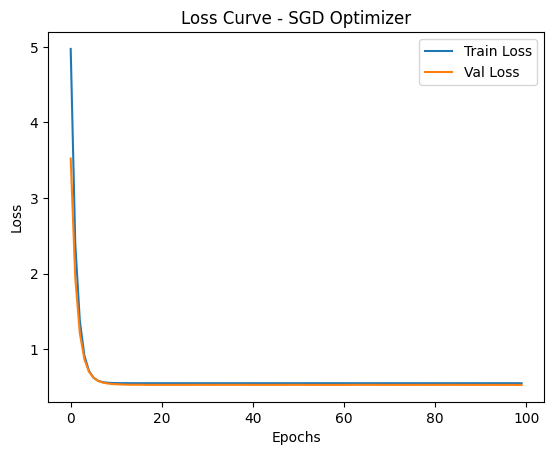


R² Scores for Gradient Descent Types:
Batch GD: 0.25336157045663965
Stochastic GD: 0.32572053188292216
Mini-Batch GD: 0.3495967078033493

R² Scores for Optimizers (using Mini-Batch GD):
Adam Optimizer: 0.3029218531240405
RMSprop Optimizer: 0.354734525549402
Adagrad Optimizer: -7.909554138210506
SGD Optimizer: 0.00015450971408281777


In [15]:
# 🔹 Optimizer Techniques (all using Mini-Batch GD)
results_opt = {}

for name, opt in {
    'Adam': Adam(),
    'RMSprop': RMSprop(),
    'Adagrad': Adagrad(),
    'SGD': SGD()
}.items():
    r2 = train_model(optimizer=opt, X_train=X_train, y_train=y_train,
                     X_test=X_test, y_test=y_test, batch_size=32,
                     title=f"{name} Optimizer")
    results_opt[name] = r2

# -------------------------------------------
# Final Results
print("\nR² Scores for Gradient Descent Types:")
for k, v in results_gd.items():
    print(f"{k}: {v}")

print("\nR² Scores for Optimizers (using Mini-Batch GD):")
for k, v in results_opt.items():
    print(f"{k} Optimizer: {v}")


In [ ]:
# R² for each Gradient Descent type

# R² for each Optimizer

# 7 total loss curves

# Obervations

## <u>R² Scores for Gradient Descent Types:</u>
    
* Batch GD: 0.25336157045663965
    
* Stochastic GD: 0.32572053188292216
    
* Mini-Batch GD: 0.3495967078033493

## <u>R² Scores for Optimizers (using Mini-Batch GD):</u>
    
* Adam Optimizer: 0.3029218531240405
    
* RMSprop Optimizer: 0.354734525549402
    
* Adagrad Optimizer: -7.909554138210506
    
* SGD Optimizer: 0.00015450971408281777